In [28]:
import shutil
import pandas as pd
import numpy as np
import os

In [29]:
# Define function to map day values to month
def map_month(day):
    year = (day - 1) // 365 + 1  # Calculate the year based on the day value
    day_within_year = (day - 1) % 365 + 1  # Calculate the day within the year

    # Define the days that each month ends on (in a non-leap year)
    month_end_days = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

    # Identify the month based on the day_within_year
    for month, end_day in enumerate(month_end_days, start=1):
        if day_within_year <= end_day:
            return month


# Define function to map day values to year
def map_year(day):
    year = (day - 1) // 365 + 1
    return year

In [57]:
arr = []
for i in range(1, 3651):
    arr.append(i)

df = pd.DataFrame(arr)
df.columns = ["Day"]
df["Month"] = df["Day"].apply(map_month)
df["Year"] = df["Day"].apply(map_year)

In [71]:
July_df = df[df["Month"] == 7]
July_df = July_df[((July_df["Year"] != 4) & ((July_df["Year"] != 8)))]
July_df = July_df.reset_index(drop=True)
July_df

,Day,Month,Year
0,182,7,1
1,183,7,1
2,184,7,1
3,185,7,1
4,186,7,1
...,...,...,...
243,3493,7,10
244,3494,7,10
245,3495,7,10
246,3496,7,10


In [75]:
normalized_data_path = "C:/Users/kharep/Downloads/Pressure_normalization_data/"
ROI_data_path = "C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/Final_ROI_Dataset.csv"
new_July_Pressure_data = "C:/Users/kharep/Downloads/July_Pressure_data__rnn"

In [60]:
ROI_df = pd.read_csv(ROI_data_path)

In [61]:
ROI_df[ROI_df["Day"] == 202]

,Name,ROI,Day,Month,Width,Height,x,y,Class,Label
7487,202_56_52_c12_cp1,202_56_52,202,7,3,4,58,51,1,COH
7488,202_56_52_c12_cp1,202_56_52,202,7,3,4,56,53,1,COH
7489,202_56_52_c12_cp1,202_56_52,202,7,3,4,56,54,1,COH
7490,202_56_52_c12_cp1,202_56_52,202,7,3,4,57,54,1,COH
7491,202_56_52_c12_cp1,202_56_52,202,7,3,4,57,53,1,COH
7492,202_56_52_c12_cp1,202_56_52,202,7,3,4,58,52,1,COH
7493,202_89_21_c2_cp1,202_89_21,202,7,12,6,87,19,0,CL
7494,202_89_21_c2_cp1,202_89_21,202,7,12,6,86,20,0,CL
7495,202_89_21_c2_cp1,202_89_21,202,7,12,6,85,20,0,CL
7496,202_89_21_c2_cp1,202_89_21,202,7,12,6,84,21,0,CL


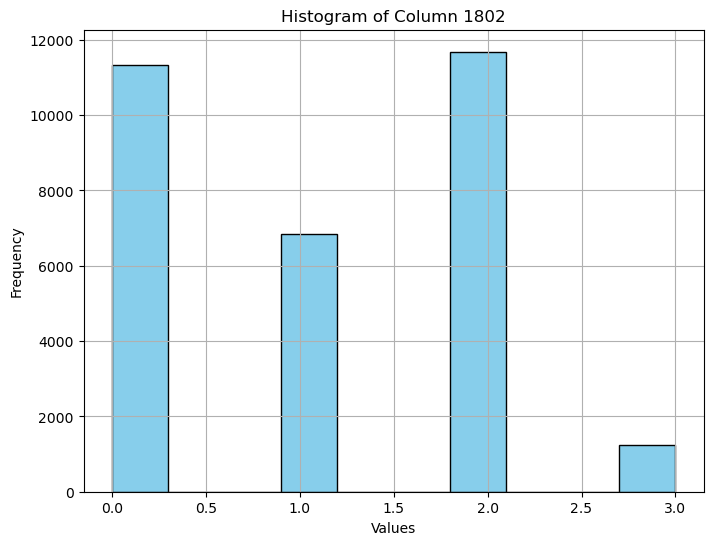

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(ROI_df['Class'], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Column 1802')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [72]:
July_ROI = {}
for i in range(ROI_df.shape[0]):
    if ROI_df['Day'][i] in July_ROI:
        if ROI_df["ROI"][i] in July_ROI[ROI_df["Day"][i]]:
            if July_ROI[ROI_df["Day"][i]][ROI_df["ROI"][i]][1] < ROI_df["Width"][i]:
                July_ROI[ROI_df["Day"][i]][ROI_df["ROI"][i]][1] = ROI_df["Width"][i]
            if July_ROI[ROI_df["Day"][i]][ROI_df["ROI"][i]][2] < ROI_df["Height"][i]:
                July_ROI[ROI_df["Day"][i]][ROI_df["ROI"][i]][2] = ROI_df["Height"][i]
        else:
            July_ROI[ROI_df["Day"][i]].update({ROI_df["ROI"][i]:[ROI_df["Class"][i], ROI_df["Width"][i], ROI_df["Height"][i]]})
    else:
        July_ROI[ROI_df["Day"][i]] = {ROI_df["ROI"][i]:[ROI_df["Class"][i], ROI_df["Width"][i], ROI_df["Height"][i]]}



In [73]:
for i in July_ROI:
    print(i)
    break

1001


In [74]:
print(July_ROI[1001])

{'1001_63_48': [2, 6, 4]}


In [76]:
margin = 15
size = 15
starts = [[margin, margin], [margin+1, margin], [margin+2, margin], [margin, margin+1], [margin+1, margin+1], [margin+2, margin+1], [margin, margin+2], [margin+1, margin+2], [margin+2, margin+2]]
start_point = 0

for i in range(July_df.shape[0]):
    df_arr = []
    day = July_df["Day"][i]
    pre_day = day - 1
    two_before = day - 2
    df_1 = pd.read_csv(normalized_data_path + "day" + str(pre_day) + ".csv")
    df_2 = pd.read_csv(normalized_data_path + "day" + str(two_before) + ".csv")
    height = df_1.shape[0] - margin
    width = df_1.shape[1] - margin
    
    # Extract ROI data for the current day from ROI_df
    roi_data = ROI_df[ROI_df['Day'] == day]
    
    if not roi_data.empty:
        coordination = set()
        
        # Processing the pixels within each ROI
        for index, roi_row in roi_data.iterrows():
            x = roi_row['x']
            y = roi_row['y']
            label = roi_row['Label']
            
            # Check if the ROI is within the valid range
            if x >= margin and y >= margin and x < width and y < height:
                # Extract the region around the ROI
                rec_1 = df_1.iloc[y-size:y+size, x-size:x+size]
                rec_2 = df_2.iloc[y-size:y+size, x-size:x+size]
                
                # Flatten the regions and append to df_arr
                row_1 = rec_1.to_numpy().flatten()
                row_2 = rec_2.to_numpy().flatten()
                row = np.append(row_2, row_1)
                
                # Append x, y, and label to the row
                row = np.append(row, x)
                row = np.append(row, y)
                row = np.append(row, label)
                
                # Append class value of the previous two days
                # Check if the previous two days exist in ROI_df
                if pre_day in ROI_df['Day'].values and two_before in ROI_df['Day'].values:
                    # Check if x, y value exists in each of the previous two days
                    pre_day_class = ROI_df[(ROI_df['Day'] == pre_day) & (ROI_df['x'] == x) & (ROI_df['y'] == y)]['Label'].values
                    two_before_class = ROI_df[(ROI_df['Day'] == two_before) & (ROI_df['x'] == x) & (ROI_df['y'] == y)]['Label'].values
                    if len(pre_day_class) > 0:
                        row = np.append(row, pre_day_class[0])
                    else:
                        row = np.append(row, -1)
                    if len(two_before_class) > 0:
                        row = np.append(row, two_before_class[0])
                    else:
                        row = np.append(row, -1)
                else:
                    row = np.append(row, -1)
                    row = np.append(row, -1)
                
                df_arr.append(row)
                
        # Processing the remaining pixels by skipping every 3 pixels
        for j in range(starts[start_point][0], height,3):
            for k in range(starts[start_point][1], width,3):
                rec_1 = df_1.iloc[j-size:j+size, k-size:k+size]
                rec_2 = df_2.iloc[j-size:j+size, k-size:k+size]

                row_1 = rec_1.to_numpy().flatten()
                row_2 = rec_2.to_numpy().flatten()
                row = np.append(row_2, row_1)

                row = np.append(row, k)
                row = np.append(row, j)
                row = np.append(row, -1)
                if pre_day in ROI_df['Day'].values and two_before in ROI_df['Day'].values:
                    # Check if x, y value exists in each of the previous two days
                    pre_day_class = ROI_df[(ROI_df['Day'] == pre_day) & (ROI_df['x'] == k) & (ROI_df['y'] == j)]['Label'].values
                    two_before_class = ROI_df[(ROI_df['Day'] == two_before) & (ROI_df['x'] == k) & (ROI_df['y'] == j)]['Label'].values
                    if len(pre_day_class) > 0:
                        row = np.append(row, pre_day_class[0])
                    else:
                        row = np.append(row, -1)
                    if len(two_before_class) > 0:
                        row = np.append(row, two_before_class[0])
                    else:
                        row = np.append(row, -1)
                else:
                    row = np.append(row, -1)
                    row = np.append(row, -1)
                
                df_arr.append(row)

    else:
        # Day does not contain ROI, process all pixels
        for j in range(starts[start_point][0], height,3):
            for k in range(starts[start_point][1], width,3):
                rec_1 = df_1.iloc[j-size:j+size, k-size:k+size]
                rec_2 = df_2.iloc[j-size:j+size, k-size:k+size]

                row_1 = rec_1.to_numpy().flatten()
                row_2 = rec_2.to_numpy().flatten()
                row = np.append(row_2, row_1)

                row = np.append(row, k)
                row = np.append(row, j)

                row = np.append(row, -1)
               
                if pre_day in ROI_df['Day'].values and two_before in ROI_df['Day'].values:
                    # Check if x, y value exists in each of the previous two days
                    pre_day_class = ROI_df[(ROI_df['Day'] == pre_day) & (ROI_df['x'] == k) & (ROI_df['y'] == j)]['Label'].values
                    two_before_class = ROI_df[(ROI_df['Day'] == two_before) & (ROI_df['x'] == k) & (ROI_df['y'] == j)]['Label'].values
                    if len(pre_day_class) > 0:
                        row = np.append(row, pre_day_class[0])
                    else:
                        row = np.append(row, -1)
                    if len(two_before_class) > 0:
                        row = np.append(row, two_before_class[0])
                    else:
                        row = np.append(row, -1)
                else:
                    row = np.append(row, -1)
                    row = np.append(row, -1)
                
                df_arr.append(row)
                
        if start_point >= len(starts)-1:
            start_point = 0
        else:
            start_point += 1

    # Convert and save the DataFrame
    dataframe = pd.DataFrame(df_arr)
    dataframe.to_csv(new_July_Pressure_data + "/day"+ str(day) + ".csv", index=False)
